## LINEAR REGRESSION

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

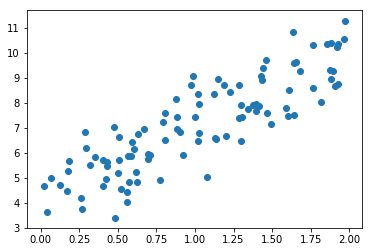

In [8]:
plt.scatter(X,y)
plt.show()

In [9]:
#compute theta using the normal equation

#add x0=1 to each instance
X_b = np.c_[np.ones((100,1)),X]

In [10]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
#close enough to 4 and 3 but the noise made it hard to get them exactly
theta_best

array([[4.22924805],
       [2.8609863 ]])

In [31]:
X_b.T.dot(X_b)

array([[100.        , 101.75403519],
       [101.75403519, 134.3315972 ]])

## now you can make predictions with Theta

In [14]:
X_new = np.array([[0],[2]])
X_new

array([[0],
       [2]])

In [15]:
#add ones to x0
X_new_b = np.c_[np.ones((2,1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [16]:
#test 1 point
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.14395844],
       [9.9316358 ]])

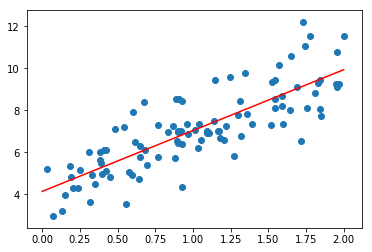

In [17]:
#plot this model's predictions
plt.plot(X_new, y_predict, "r-")
plt.scatter(X,y)
plt.show()

## Linear Regression using Scikit-Learn

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.14395844]), array([[2.89383868]]))

In [20]:
lin_reg.predict(X_new)

array([[4.14395844],
       [9.9316358 ]])

In [21]:
#Singular Value Decomposition
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.14395844],
       [2.89383868]])

In [46]:
#Gradient descent
eta = .1
n_iterations = 1000
m = 100

In [47]:
theta = np.random.rand(2,1) #random initialization
theta

array([[0.91680706],
       [0.54467387]])

In [48]:
for iteration in range(n_iterations):
    #MSE
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    #b/m: yval/slope
    theta = theta - eta*gradients

In [49]:
#exactly what the normal equation found!
theta

array([[4.14395844],
       [2.89383868]])

In [26]:
#STOCHASTIC GRADIENT DESCENT
n_epochs = 50
t0, t1 = 5,50 #learning schedule hyperparameters

In [27]:
def learning_schedule(t):
    return(t0/(t + t1))

In [28]:
theta = np.random.randn(2,1) #random initialization

In [29]:
#only 50 random iterations opposed to 1000
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta * gradients

In [30]:
theta

array([[4.11347744],
       [2.97389986]])

In [31]:
#SGD linear regression
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=.1)
sgd_reg.fit(X, y.ravel())

C:\Users\jashcrof\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [32]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.20692286]), array([2.96830326]))